# Heyns et al. (2020)

This notebook show example of the measurements from the Fredericksbur (FRD) station and nearby stations obtained from FDSN network.
Figure 1 by [Heyns et al. (2020)]((https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020SW002557)) illustrates such measurement in comparion with GIC measurments 

Heyns, M. J., Lotz, S. I., & Gaunt, C. T. (2021). Geomagnetic pulsations driving geomagnetically induced currents. Space Weather, 19, e2020SW002557. https://doi.org/10.1029/2020SW002557

In [32]:
from IPython.display import Image
Image(url= "https://agupubs.onlinelibrary.wiley.com/cms/asset/015c5548-201a-4fd0-a676-b8b872089875/swe21080-fig-0001-m.jpg", width=900, height=600)

# Plot FRD station data using PySPEDAS

To obtain the measurements from FRD station we use themis.gmag module

27-Nov-23 18:51:20: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
27-Nov-23 18:51:20: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
27-Nov-23 18:51:20: Time clip was applied to: thg_mag_frd


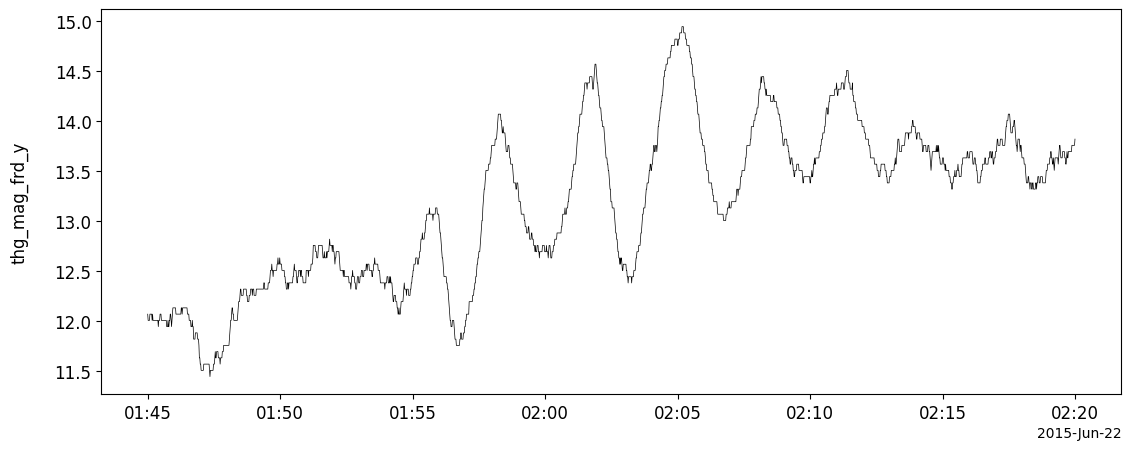

In [33]:
import pyspedas, pytplot

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
# Load data from FDR station
pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)

# Split data into individual components
pytplot.split_vec('thg_mag_frd')

# Plot y component
pytplot.tplot('thg_mag_frd_y')

The output from pytplot is the same as in Figure 1 from Heyns et al. (2020) 

# Search for nearby stations

FRD station coordinates are presented in Table 1 from Heyns et al. (2020)

| Station         | Geographic latitude | Geographic longitude | Geomagnetic MLat. | Geomagnetic MLon. |
|-----------------|---------------------|----------------------|-------------------|-------------------|
| Fredericksburg  | 38.2°               | −77.4°               | 47.8°             | −0.2°             |

To find nearby station we can use the (https://ds.iris.edu/gmap/) webpage.





In [34]:
from IPython.display import IFrame
from datetime import datetime, timedelta

date_fmt = "%Y-%m-%dT%H:%M:%S"
sdate = datetime.strptime(date_start, date_fmt).strftime('%Y-%m-%d') # Only date 
edate =(datetime.strptime(date_start, date_fmt) + timedelta(days=1)).strftime('%Y-%m-%d') # Only date but plus one day
net = '*' # Select all networks
lat = 38.2 # Geographic latitude
lon = -77.4 # Geographic longitude
rad = 7  # Radius of the area

# Construct url using fstring
url= f'https://ds.iris.edu/gmap/#network={net}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,500)

https://ds.iris.edu/gmap/#network=*&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=7&drawingmode=radial&planet=earth


The previous request provided multiple stations, including FRD. Now we need to limit the search to the stations that can provide magnetometer data in IRIS. According to the Standard for the Exchange of Earthquake Data (or **SEED**) [reference manual appendix A](https://www.fdsn.org/pdf/SEEDManual_V2.4_Appendix-A.pdf), the SEED format uses three letters to name the channels (Band code, Instrument code and Orientation code). We are interested in magnetomenter data which has an instrument code **F**. However, the wildcard '\*F\*' will return channels that also ends with 'F' and do not represent magnetic field data. Hence, we include only list of channels that correspond to low frequency magnetic field measurements: MF\*, LF\*, VF\*, UF\*. Note, that we did not include the orientation code, which can be **Z**, **N**, **E** (Vertical, North-South, East-West). To exclude channels that may represent something else (e.g.,  **VFP** Packet Buffer Usage), we can futher limit our search to North oriented magnetomenter: MFN, LFN, VFN, UFN

In [35]:
channel = "MFN,LFN,VFN,UFN" 
url= f'https://ds.iris.edu/gmap/#network={net}&channel={channel}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,500)

https://ds.iris.edu/gmap/#network=*&channel=MFN,LFN,VFN,UFN&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=7&drawingmode=radial&planet=earth


Let select station **REQ48** from network **4P** and load data using mth5 format

  network station location channel                start                  end
0      4P   REQ48       --     *F*  2015-06-22T01:45:00  2015-06-22T02:20:00
2023-11-27T18:51:23.460726-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5


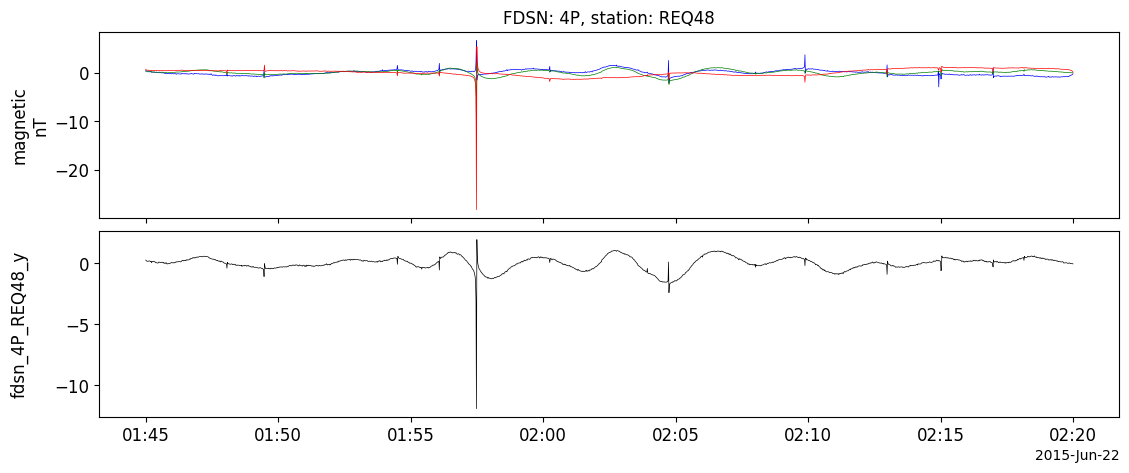

In [36]:
from pyspedas.mth5.load_fdsn import load_fdsn
load_fdsn(network="4P", station="REQ48", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_4P_REQ48')

# Plot all data and the y component
pytplot.tplot(['fdsn_4P_REQ48', 'fdsn_4P_REQ48_y'])

Let explore another station**REU49** from the same network **4P**

  network station location channel                start                  end
0      4P   REU49       --     *F*  2015-06-22T01:45:00  2015-06-22T02:20:00
2023-11-27T18:51:25.728282-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5


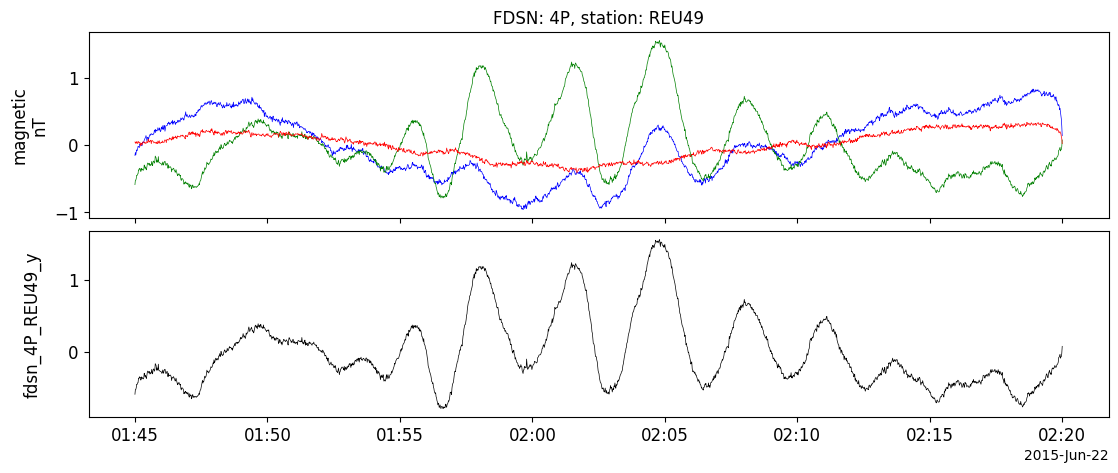

In [37]:
load_fdsn(network="4P", station="REU49", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_4P_REU49')

# Plot all data and the y component
pytplot.tplot(['fdsn_4P_REU49', 'fdsn_4P_REU49_y'])

# Compare the results

Finally, we can compare the results by plotting normalized By from all 3 stations. For simply subtract the median value.

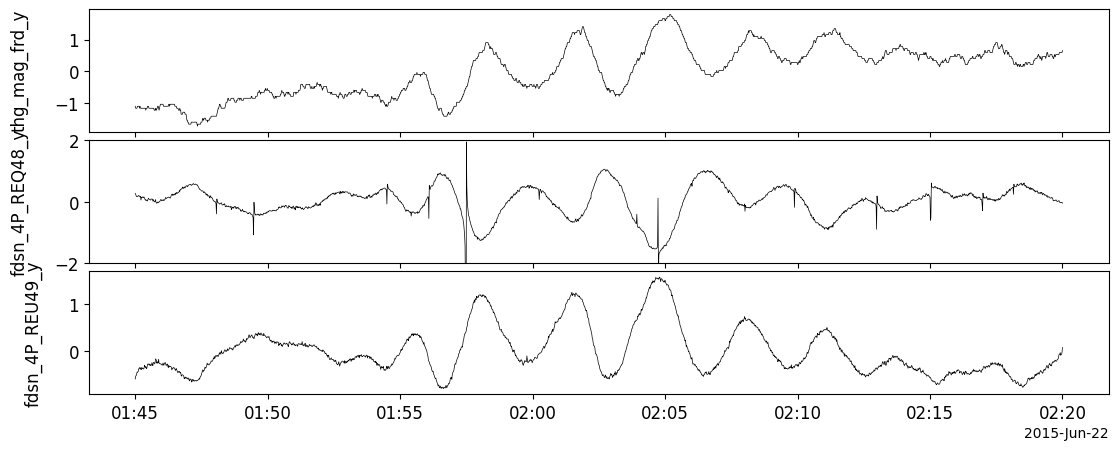

In [38]:
import numpy as np

tplot_vars = ['thg_mag_frd_y', 'fdsn_4P_REQ48_y', 'fdsn_4P_REU49_y']

for var in tplot_vars:
   time, by = pytplot.get_data(var)  # Unpack tplot variable
   by -= np.mean(by)  # Subtract median
   
pytplot.options('fdsn_4P_REQ48_y', 'yrange', [-2, 2])  # Manually set the range, because 4P REQ48 have outliers in the signal
pytplot.tplot(tplot_vars)